<a href="https://colab.research.google.com/github/JUMITO737/Extraccion_de_Caracteristica/blob/main/Act_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad 5 (Extracción de Características)

1. Crear un repositorio nuevo con el nombre: Extracción de características

2. Agregar el archivo: microretailer_mit_lift_lab.xlsx

3. Aplicar métodos para reemplazar valores nulos del dataframe

4. Aplicar métodos (Desviación Estándar o Rango Intercuartílico) para eliminar Outliers del dataframe

5. Extraer características a partir de aplicar un análisis univariado, a diferentes variables categóricas (20). Mostrar los resultados obtenidos ,mediante gráficas y tablas

6. Crear el archivo en Google COLAB, respaldarlo en GitHub, y agregar un archivo .doc general del análisis que reporte los hallazgos obtenidos.

7. Subir el link del repositorio en CANVAS para “Evaluación”

## Librerias :

In [ ]:
%pip install funpymodeling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 34.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 61.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.7/203.7 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 72.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 37.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.4/93.4 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 61.7 MB/s eta 0:00:00
  Attempting uninstall: ty

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl
from google.colab import files

## Archivo :

In [ ]:
#files.upload()

In [ ]:
Micro_Retailer= pd.read_excel('microretailer_mit_lift_lab.xlsx')

In [ ]:
Micro_Retailer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Columns: 106 entries, _record_id to 235_email
dtypes: float64(23), int64(2), object(81)
memory usage: 141.7+ KB


In [ ]:
Micro_Retailer.head(5)

,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,228_store_name,229_store_picture,232_type_of_store,...,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,236_whatsapp,235_email
0,dff2998e-af74-4de6-8efd-488aca24e67b,"November 12, 2022",2022-11-12 22:15:10 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.233822273 19.0535362706),19.053536,-98.233822,Eugene’s Compostura,1 Photo,Tailor,...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
1,c596412f-4fc2-4983-acba-d9565859e42f,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2341421351 19.0535610353),19.053561,-98.234142,Frutas y verduras Angy,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
2,5bb632b3-41b5-4fb6-a817-b564e8b45a48,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.232299887 19.058654656),19.058655,-98.232300,Libélula,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
3,6774a0f6-bab4-4a58-bf94-95ad0b7cb438,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2331576513 19.0592929035),19.059293,-98.233158,Quality fix,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
4,6cc637fa-3d54-48c7-9499-6de13d0a26aa,"November 12, 2022",2022-11-12 22:15:08 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2338639604 19.0595846029),19.059585,-98.233864,Artesanías Los Pinos,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN


In [ ]:
df = Micro_Retailer.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Columns: 106 entries, _record_id to 235_email
dtypes: float64(23), int64(2), object(81)
memory usage: 141.7+ KB


## Limpieza :

### Valores Nulos

In [ ]:
df.isnull().sum()

_record_id                                0
_title                                    0
_server_updated_at                        0
_updated_by                               0
_geometry                                 0
                                       ... 
234_willingness_participate_workshop     73
318_shopkeeper_name                     123
319_shopkeepers_last_name               125
236_whatsapp                            129
235_email                               142
Length: 106, dtype: int64

In [ ]:
df1 =df.fillna(method="bfill")
df1.isnull().sum()

_record_id                              0
_title                                  0
_server_updated_at                      0
_updated_by                             0
_geometry                               0
                                       ..
234_willingness_participate_workshop    5
318_shopkeeper_name                     5
319_shopkeepers_last_name               5
236_whatsapp                            5
235_email                               5
Length: 106, dtype: int64

In [ ]:
df1 = df1.fillna(method="ffill")
df1.isnull().sum()

_record_id                              0
_title                                  0
_server_updated_at                      0
_updated_by                             0
_geometry                               0
                                       ..
234_willingness_participate_workshop    0
318_shopkeeper_name                     0
319_shopkeepers_last_name               0
236_whatsapp                            0
235_email                               0
Length: 106, dtype: int64

In [ ]:
df1.isnull().sum().sum()

684

In [ ]:
df.shape

(171, 106)

In [ ]:
columnas_vacias = df1.columns[df1.isna().all()].tolist()

df1 = df1.drop(columns=columnas_vacias)

In [ ]:
df1.shape

(171, 102)

In [ ]:
df1.isnull().sum().sum()

0

### Outliers

In [ ]:
numeric_columns = df1.select_dtypes(include=['number'])

In [ ]:
def remove_outliers_iqr(df1, column_name, threshold=1.5):
    Q1 = df1[column_name].quantile(0.25)
    Q3 = df1[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    df1 = df1[(df1[column_name] >= lower_bound) & (df1[column_name] <= upper_bound)]
    return df1

for column in numeric_columns.columns:
    df1 = remove_outliers_iqr(df1, column)

# Concatena las columnas no numéricas nuevamente
df2 = pd.concat([df1, df1.select_dtypes(exclude=['object'])], axis=1)

df2.shape

(45, 123)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Columns: 106 entries, _record_id to 235_email
dtypes: float64(23), int64(2), object(81)
memory usage: 141.7+ KB


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 0 to 170
Columns: 102 entries, _record_id to 235_email
dtypes: float64(19), int64(2), object(81)
memory usage: 36.2+ KB


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 0 to 170
Columns: 123 entries, _record_id to 236_whatsapp
dtypes: float64(38), int64(4), object(81)
memory usage: 43.6+ KB


In [ ]:
df2.isnull().sum().sum()

0

## Actividad :

In [ ]:
freq_tbl(df2)

                              _record_id  frequency  percentage  \
0   dff2998e-af74-4de6-8efd-488aca24e67b          1    0.022222   
1   555a5830-66b1-47b5-b174-5480c3b38f8f          1    0.022222   
2   f7b97386-e045-468c-b9e3-1ed1d0f05bbd          1    0.022222   
3   67df942e-bcee-47c2-aee4-bb51d2d741c1          1    0.022222   
4   4a003685-e2bb-4625-9421-1a1613de2142          1    0.022222   
5   a2bbf1f3-757a-4823-8421-507882c88e9d          1    0.022222   
6   19b5953c-88de-4598-9aa9-9a807fd5eb44          1    0.022222   
7   316ece52-c3af-47f8-9606-6144a0ae9ed2          1    0.022222   
8   e326e6a0-7462-4157-bad9-7b3ad61b524b          1    0.022222   
9   0ab45eeb-e160-42f4-8fc3-fe32c1abc3b0          1    0.022222   
10  2733a84c-054d-4b36-8150-0b336ce4d761          1    0.022222   
11  4a93fc02-578e-4c24-ab33-c825afe3dc84          1    0.022222   
12  149bebb8-4180-4485-88ae-cafc642661b2          1    0.022222   
13  1f6fd33a-a89a-4dc5-95bd-03f396e68bf8          1    0.02222

In [98]:
categoricas = df2.select_dtypes(include=['object', 'category', 'number'])

In [99]:
nombres_categoricas = categoricas.columns[20:]
print("Variables categóricas:")
for nombre in nombres_categoricas:
    print(nombre)

Variables categóricas:
233_date_establishment
2_current_permanent_employees
4_number_permanent_employees_last_year
5_change_store_space_last_year
6_change_employees_average_salary_last_year
20_reviews_finances_monthly
49_inventory_records
18_sales_records
155_sales_registers_used_for
103_number_own_fridges
19_tax_id
145_number_direct_competitors
310_burnout
24_burnout
186_internet_connection
210_sales_channels
189_payment_methods
28_prefered_payment_method
31_different_prices_payment_method
269_cash_discount
270_card_extra_charge
272_card_days_receive_money
30_payment_methods_large_purchases
214_customer_relationship_tools
33_credit_to_customers
276_expected_days_informal_credit
35_interest_rate
36_credit_default_rate
38_average_margin_profits
193_sales_planning_tools
227_agreement_ecommerce_platforms
60_services
315_frequency_topups
316_frequency_utility_bills
317_home_deliveries
62_frequency_only_services
78_number_home_deliveries_week
77_delivery_timeslots
79_delivery_vehicle
64_com

In [107]:
table1= freq_tbl(df2['232_type_of_store'])
print( table1)

                  232_type_of_store  frequency  percentage  cumulative_perc
0    Grocery store (aka. nanostore)         12    0.266667         0.266667
1   Micro-restaurant (aka. fondita)          7    0.155556         0.422222
2                    Dairy products          2    0.044444         0.466667
3                            Tailor          1    0.022222         0.488889
4                        Ferretería          1    0.022222         0.511111
5          Productos tradicionales           1    0.022222         0.533333
6                     Laundry Store          1    0.022222         0.555556
7                  Technology store          1    0.022222         0.577778
8                          Toolshop          1    0.022222         0.600000
9                         Cafeteria          1    0.022222         0.622222
10                       Peluqueria          1    0.022222         0.644444
11                   Tienda de ropa          1    0.022222         0.666667
12          

In [101]:
Filtro= table1[table1['frequency']>=1]
Filtro

,232_type_of_store,frequency,percentage,cumulative_perc
0,Grocery store (aka. nanostore),12,0.266667,0.266667
1,Micro-restaurant (aka. fondita),7,0.155556,0.422222
2,Dairy products,2,0.044444,0.466667
3,Tailor,1,0.022222,0.488889
4,Ferretería,1,0.022222,0.511111
5,Productos tradicionales,1,0.022222,0.533333
6,Laundry Store,1,0.022222,0.555556
7,Technology store,1,0.022222,0.577778
8,Toolshop,1,0.022222,0.600000
9,Cafeteria,1,0.022222,0.622222


In [102]:
Filtro_index= Filtro.set_index('232_type_of_store')
Filtro_index.head(20)

,frequency,percentage,cumulative_perc
232_type_of_store,,,
Grocery store (aka. nanostore),12,0.266667,0.266667
Micro-restaurant (aka. fondita),7,0.155556,0.422222
Dairy products,2,0.044444,0.466667
Tailor,1,0.022222,0.488889
Ferretería,1,0.022222,0.511111
Productos tradicionales,1,0.022222,0.533333
Laundry Store,1,0.022222,0.555556
Technology store,1,0.022222,0.577778
Toolshop,1,0.022222,0.600000


Text(0, 0.5, 'Frecuencia')

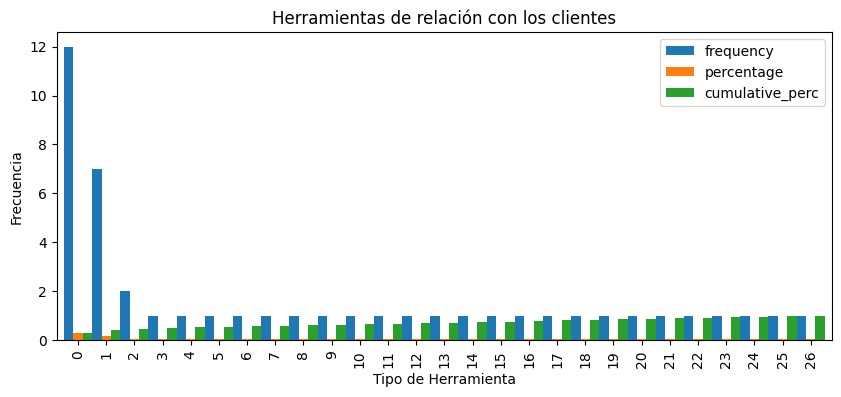

In [103]:
Filtro.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Herramientas de relación con los clientes')
plt.xlabel('Tipo de Herramienta')
plt.ylabel('Frecuencia')

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

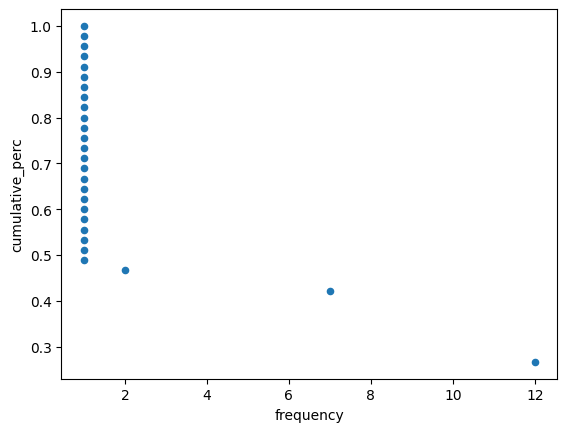

In [104]:
Filtro.plot("frequency", "cumulative_perc", kind="scatter")

<Axes: >

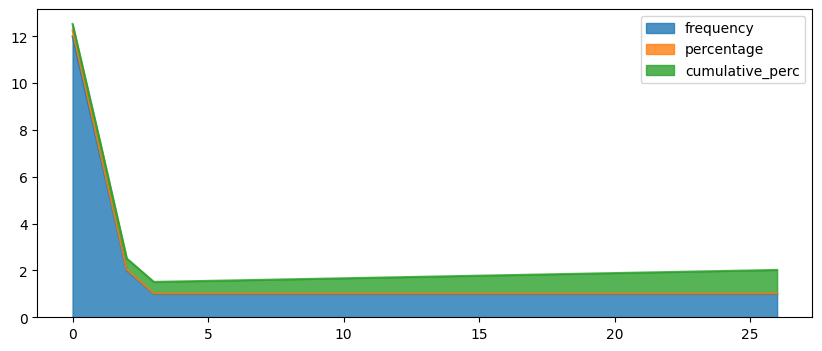

In [105]:
Filtro.plot(kind='area', figsize=(10,4),alpha = 0.8)

<Axes: ylabel='frequency'>

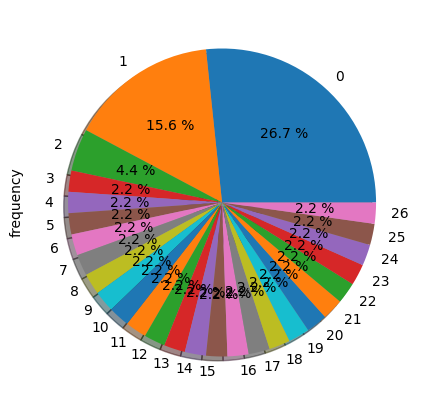

In [106]:
Filtro["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")